In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("data/data.csv")
df = data.copy()
artist_data = pd.read_csv("data/data_by_artist.csv")
genre_data = pd.read_csv('data/data_by_genres.csv')
year_data = pd.read_csv('data/data_by_year.csv')

# EDA
## song df

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [5]:
data['release_date'] = data['release_date'].astype(str)

# Define a function to handle date conversion
def convert_date(date_str):
    if len(date_str) == 4:  # Only year is present
        return pd.to_datetime(date_str + '-01-01')  # Defaulting to January 1st of the given year
    else:
        return pd.to_datetime(date_str)

# Apply the conversion function to the release_date column
data['release_date'] = data['release_date'].apply(convert_date)
data['release_date'] = pd.to_datetime(data['release_date'])
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   1921-01-01   
1                            Clancy Lowered the Boom           5   1921-01-01   
2                                          Gati Bali           5   1921-01-01   
3                                          Danny Boy           3   1921-01-01   
4                        When Irish Eyes Are Smiling           2   1921-01-01   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [6]:
data.describe().T

count                           mean  \
valence           170653.0                       0.528587   
year              170653.0                    1976.787241   
acousticness      170653.0                       0.502115   
danceability      170653.0                       0.537396   
duration_ms       170653.0                  230948.310666   
energy            170653.0                       0.482389   
explicit          170653.0                       0.084575   
instrumentalness  170653.0                        0.16701   
key               170653.0                       5.199844   
liveness          170653.0                       0.205839   
loudness          170653.0                      -11.46799   
mode              170653.0                       0.706902   
popularity        170653.0                      31.431794   
release_date        170653  1977-01-25 06:06:37.311503424   
speechiness       170653.0                       0.098393   
tempo             170653.0                      116.86159   

                                  min                  25%  \
valence                           0.0                0.317   
year                           1921.0               1956.0   
acousticness                      0.0                0.102   
danceability                      0.0                0.415   
duration_ms                    5108.0             169827.0   
energy                            0.0                0.255   
explicit                          0.0                  0.0   
instrumentalness                  0.0                  0.0   
key                               0.0                  2.0   
liveness                          0.0               0.0988   
loudness                        -60.0              -14.615   
mode                              0.0                  0.0   
popularity                        0.0                 11.0   
release_date      1921-01-01 00:00:00  1956-01-01 00:00:00   
speechiness                       0.0               0.0349   
tempo                             0.0               93.421   

                                  50%                  75%  \
valence                          0.54                0.747   
year                           1977.0               1999.0   
acousticness                    0.516                0.893   
danceability                    0.548                0.668   
duration_ms                  207467.0             262400.0   
energy                          0.471                0.703   
explicit                          0.0                  0.0   
instrumentalness             0.000216                0.102   
key                               5.0                  8.0   
liveness                        0.136                0.261   
loudness                       -10.58               -7.183   
mode                              1.0                  1.0   
popularity                       33.0                 48.0   
release_date      1977-11-04 00:00:00  1999-02-03 00:00:00   
speechiness                     0.045               0.0756   
tempo                         114.729              135.537   

                                  max            std  
valence                           1.0       0.263171  
year                           2020.0      25.917853  
acousticness                    0.996       0.376032  
danceability                    0.988       0.176138  
duration_ms                 5403500.0  126118.414668  
energy                            1.0       0.267646  
explicit                          1.0       0.278249  
instrumentalness                  1.0       0.313475  
key                              11.0       3.515094  
liveness                          1.0       0.174805  
loudness                        3.855       5.697943  
mode                              1.0       0.455184  
popularity                      100.0      21.826615  
release_date      2020-11-24 00:00:00            NaN  
speechiness                      0.97        0.1

In [7]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [26]:
def determine_column_counts(df):
    columns = df.columns
    columns = columns.drop('id')
    data_counts = pd.DataFrame(columns = ['column_name','column_type','num_rows','distinct_data', 'distinct_percent', 'missing_data', 'missing_percentage'])
    
    #For each column, calculate number and percentage of missing rows and distinct counts
    for col in columns :
        col_vals = df[col]
        total_data = len(col_vals)
        col_missing = sum(col_vals.isnull())
        missing_percent = round((col_missing / len(df[col])) * 100 , 3)
        col_distinct = (col_vals.nunique())
        distinct_percent = round((col_distinct / len(df[col])) * 100 , 3)

        data_counts.loc[len(data_counts)] = [col, col_vals.dtype, total_data, col_distinct, distinct_percent, col_missing, missing_percent]
        
    return(data_counts)

missing_data = determine_column_counts(data)
missing_data

column_name     column_type  num_rows  distinct_data  \
0            valence         float64    170653           1733   
1               year           int64    170653            100   
2       acousticness         float64    170653           4689   
3            artists          object    170653          34088   
4       danceability         float64    170653           1240   
5        duration_ms           int64    170653          51755   
6             energy         float64    170653           2332   
7           explicit           int64    170653              2   
8   instrumentalness         float64    170653           5401   
9                key           int64    170653             12   
10          liveness         float64    170653           1740   
11          loudness         float64    170653          25410   
12              mode           int64    170653              2   
13              name          object    170653         133638   
14        popularity           int64    170653            100   
15      release_date  datetime64[ns]    170653          10968   
16       speechiness         float64    170653           1626   
17             tempo         float64    170653          84694   
18            decade          object    170653             11   

    distinct_percent  missing_data  missing_percentage  
0              1.016             0                 0.0  
1              0.059             0                 0.0  
2              2.748             0                 0.0  
3             19.975             0                 0.0  
4              0.727             0                 0.0  
5             30.328             0                 0.0  
6              1.367             0                 0.0  
7              0.001             0                 0.0  
8              3.165             0                 0.0  
9              0.007             0                 0.0  
10             1.020             0                 0.0  
11            14.890             0                 0.0  
12             0.001             0                 0.0  
13            78.310             0                 0.0  
14             0.059             0                 0.0  
15             6.427             0                 0.0  
16             0.953             0                 0.0  
17            49.629             0                 0.0  
18             0.006             0                 0.0

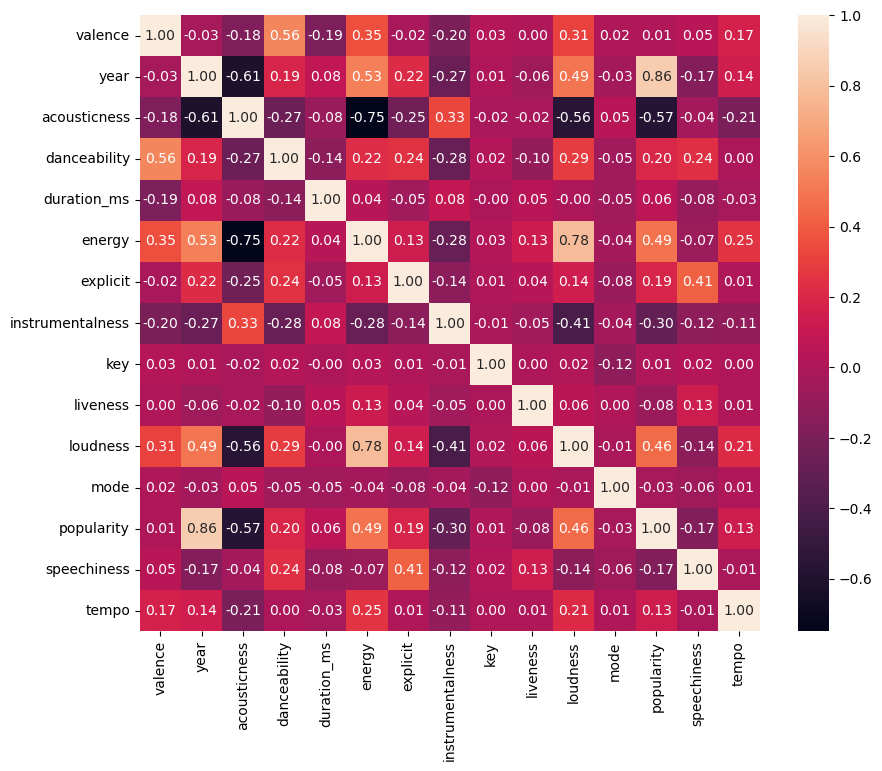

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
#pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


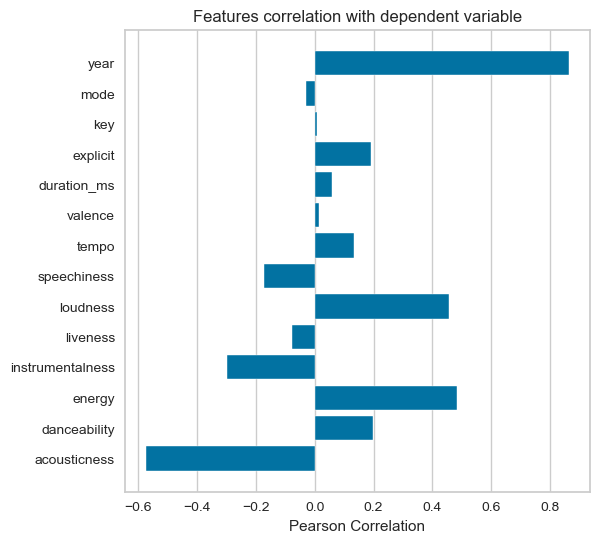

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [23]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(6,6)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Distribution of Music')

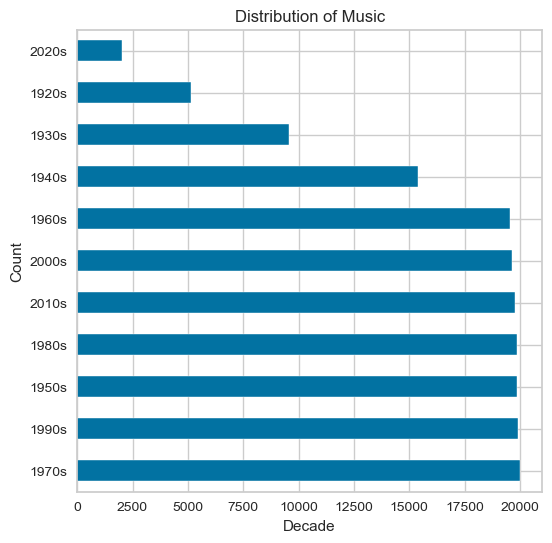

In [25]:
data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s')
decades = data.decade.value_counts()
decades.plot(kind='barh')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Music')

In [28]:
#pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


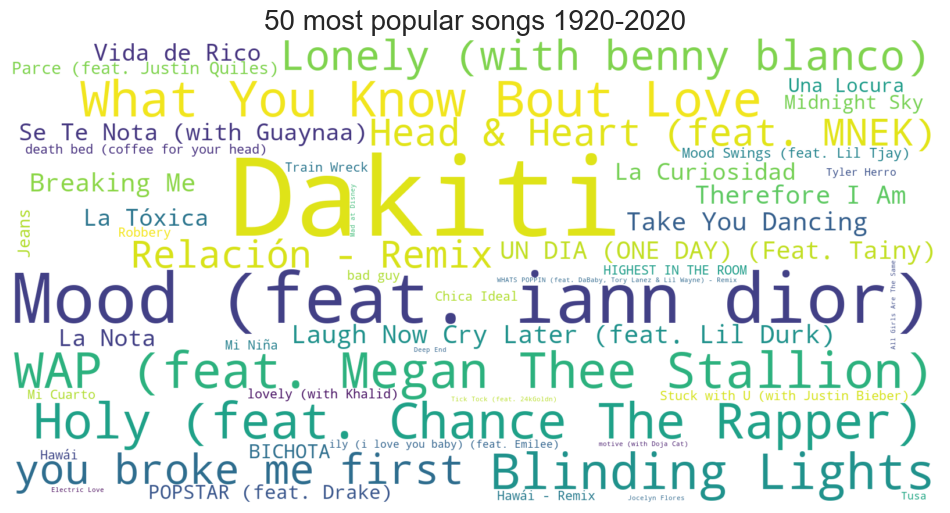

In [29]:
from wordcloud import WordCloud
song_popularity = data[['name', 'popularity']].set_index('name').to_dict()['popularity']
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2020', fontsize=20)
plt.show()

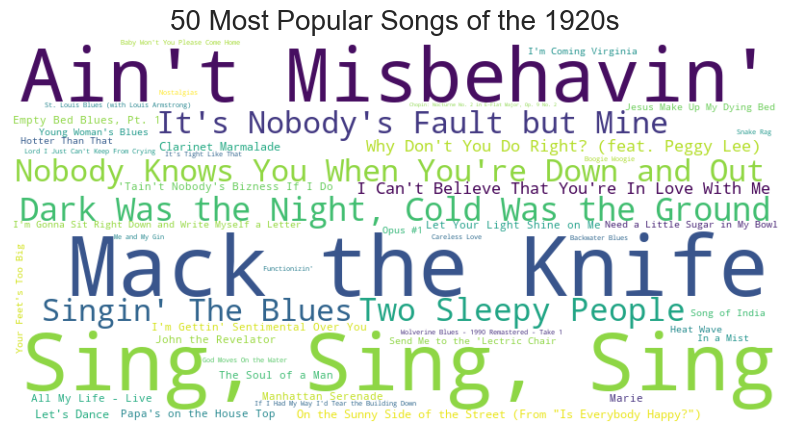

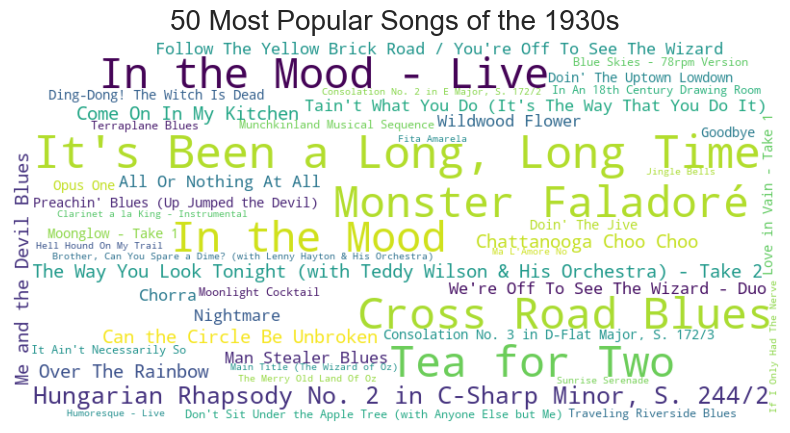

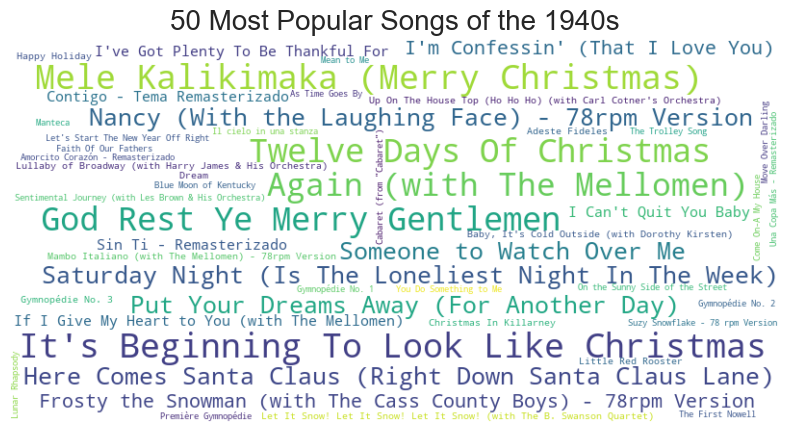

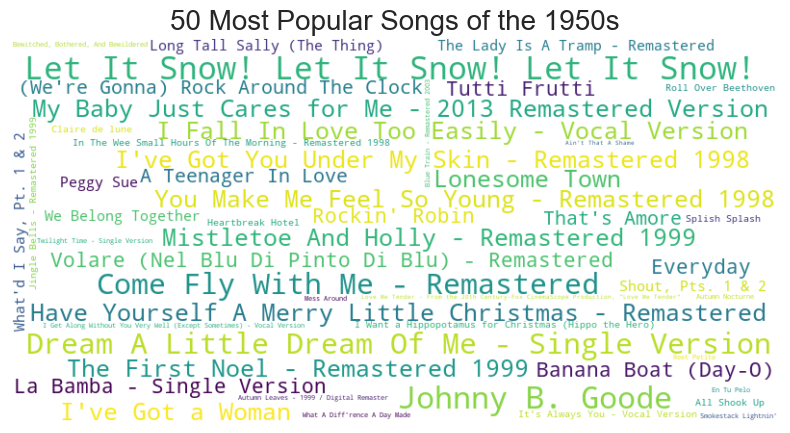

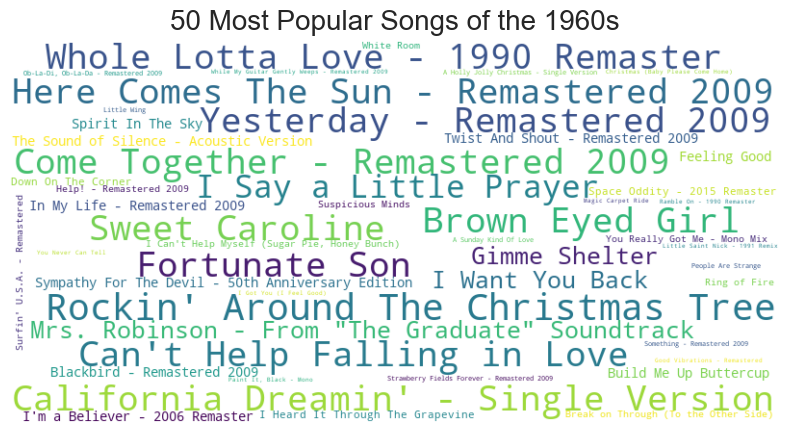

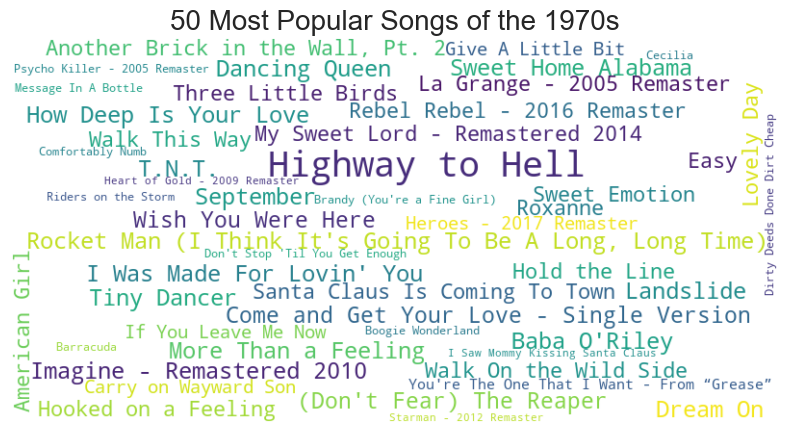

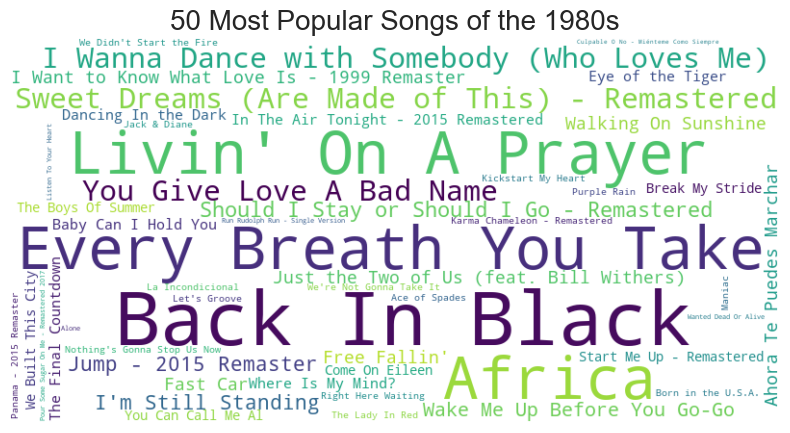

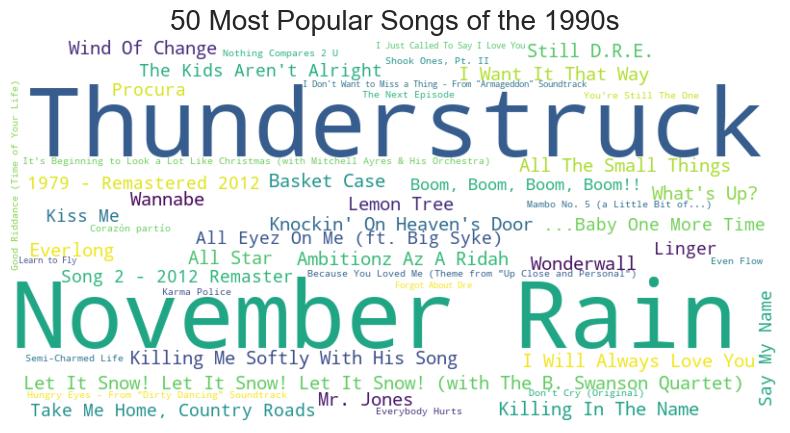

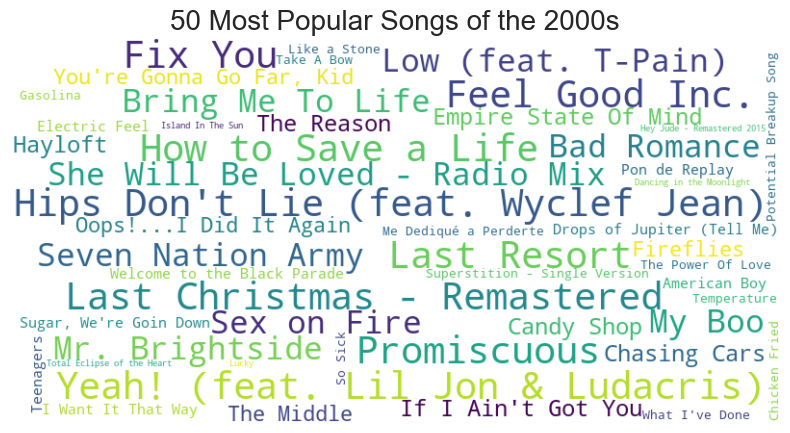

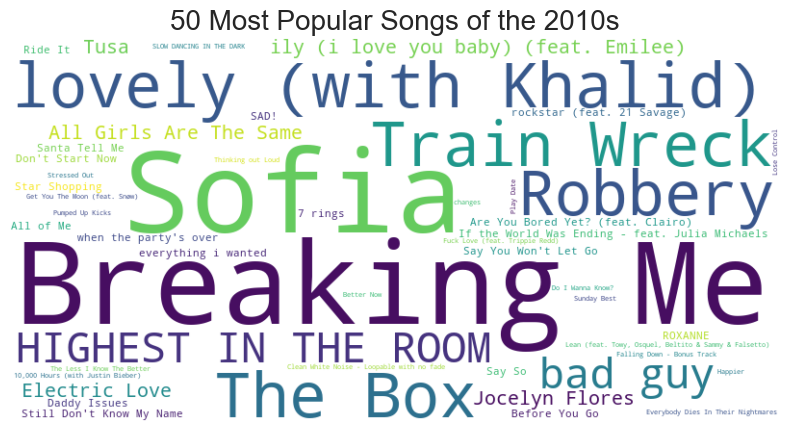

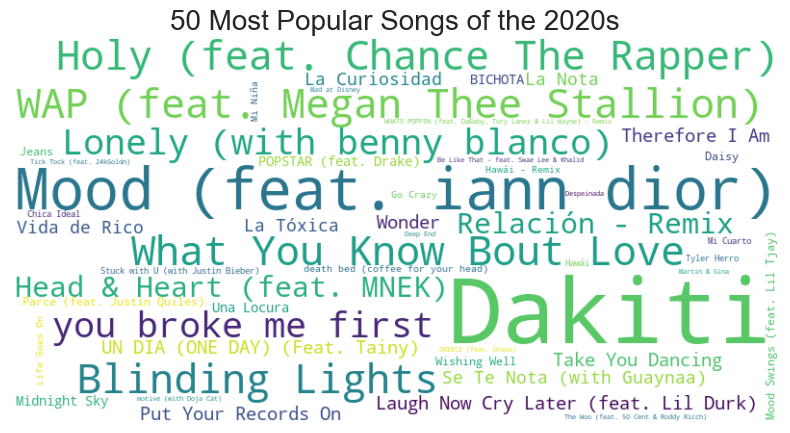

In [34]:
from wordcloud import WordCloud

for decade in sorted(data['decade'].unique()):
    # Filter songs by decade
    decade_data = data[data['decade'] == decade]
    
    # Create a dictionary of song names and popularity
    song_popularity = decade_data[['name', 'popularity']].set_index('name').to_dict()['popularity']
    
    # Sort songs by popularity within the decade
    sorted_songs = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)
    
    # Generate word cloud from frequencies
    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(dict(sorted_songs))
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'50 Most Popular Songs of the {decade}', fontsize=20)
    plt.show()

There is no missing data present within the dataset, with 170653 rows. 

There are a few columns with only a couple distinct values - explicity and mode both only have two distinct values. 

Name, tempo, duration_ms have the highest percent of distinct data

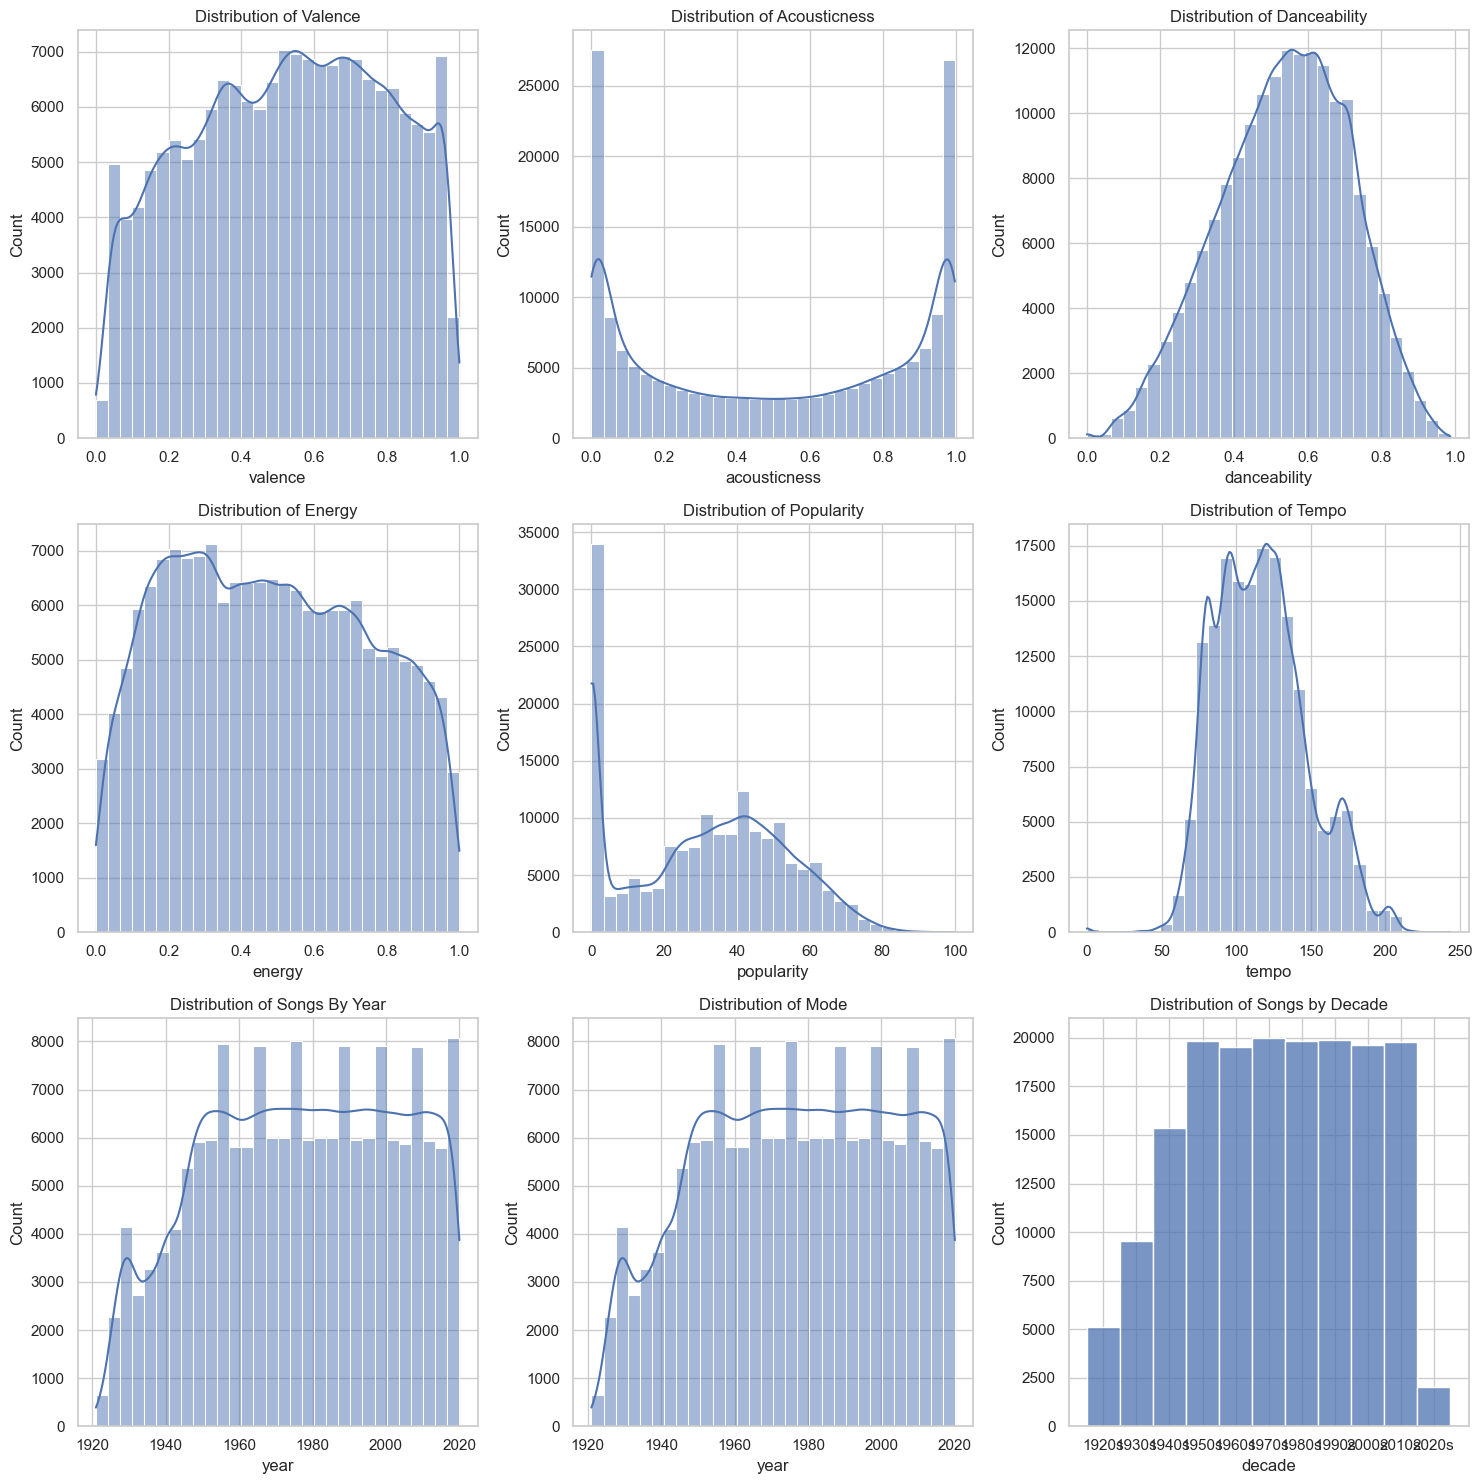

In [10]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of some key features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Valence distribution
sns.histplot(data['valence'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Valence')

# Acousticness distribution
sns.histplot(data['acousticness'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Acousticness')

# Danceability distribution
sns.histplot(data['danceability'], bins=30, kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribution of Danceability')

# Energy distribution
sns.histplot(data['energy'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Energy')

# Popularity distribution
sns.histplot(data['popularity'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Popularity')

# Tempo distribution
sns.histplot(data['tempo'], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Tempo')


# Year distribution
sns.histplot(data['year'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Songs By Year')

# Mode distribution
sns.histplot(data['year'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Mode')

data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s' )
sns.histplot(data['decade'], bins=30,  ax=axes[2, 2])
axes[2, 2].set_title('Distribution of Songs by Decade')

plt.tight_layout()
plt.show()


Distribution of Valence: Peaks in the mid-range, suggesting that most songs have moderate levels of musical positiveness.

Distribution of Acousticness: Shows a U-shaped distribution, indicating that songs are typically either highly acoustic or not at all.

Distribution of Danceability: Follows a bell-shaped curve centered around 0.5 to 0.7, implying most songs are moderately danceable.

Distribution of Energy: Also centers around a moderate level, suggesting that most songs have a balanced energy level.

Distribution of Popularity: Heavily skewed towards lower values, indicating that most songs have low popularity scores.

Distribution of Tempo: Shows a bell-shaped distribution with a peak around 120 BPM, suggesting that this is the most common tempo for songs.

Distribution of Songs by Year: Increases over time, particularly after 1960, indicating a growing number of songs being produced or recorded in databases.

Distribution of Mode: Shows a preference for one mode over the other, indicating a commonality in the modal structure of songs, with a majority likely being in a major key given the two distinct peaks.

Distribution of Songs by Decade: There's a noticeable increase in song counts beginning in the 1950s, with each subsequent decade having more songs than the last, peaking in the 2000s. The count for the 2010s appears slightly lower than the 2000s, but it's still significantly higher than in earlier decades. This could be due to various factors including the increase in music production, distribution channels, and changes in recording technologies.

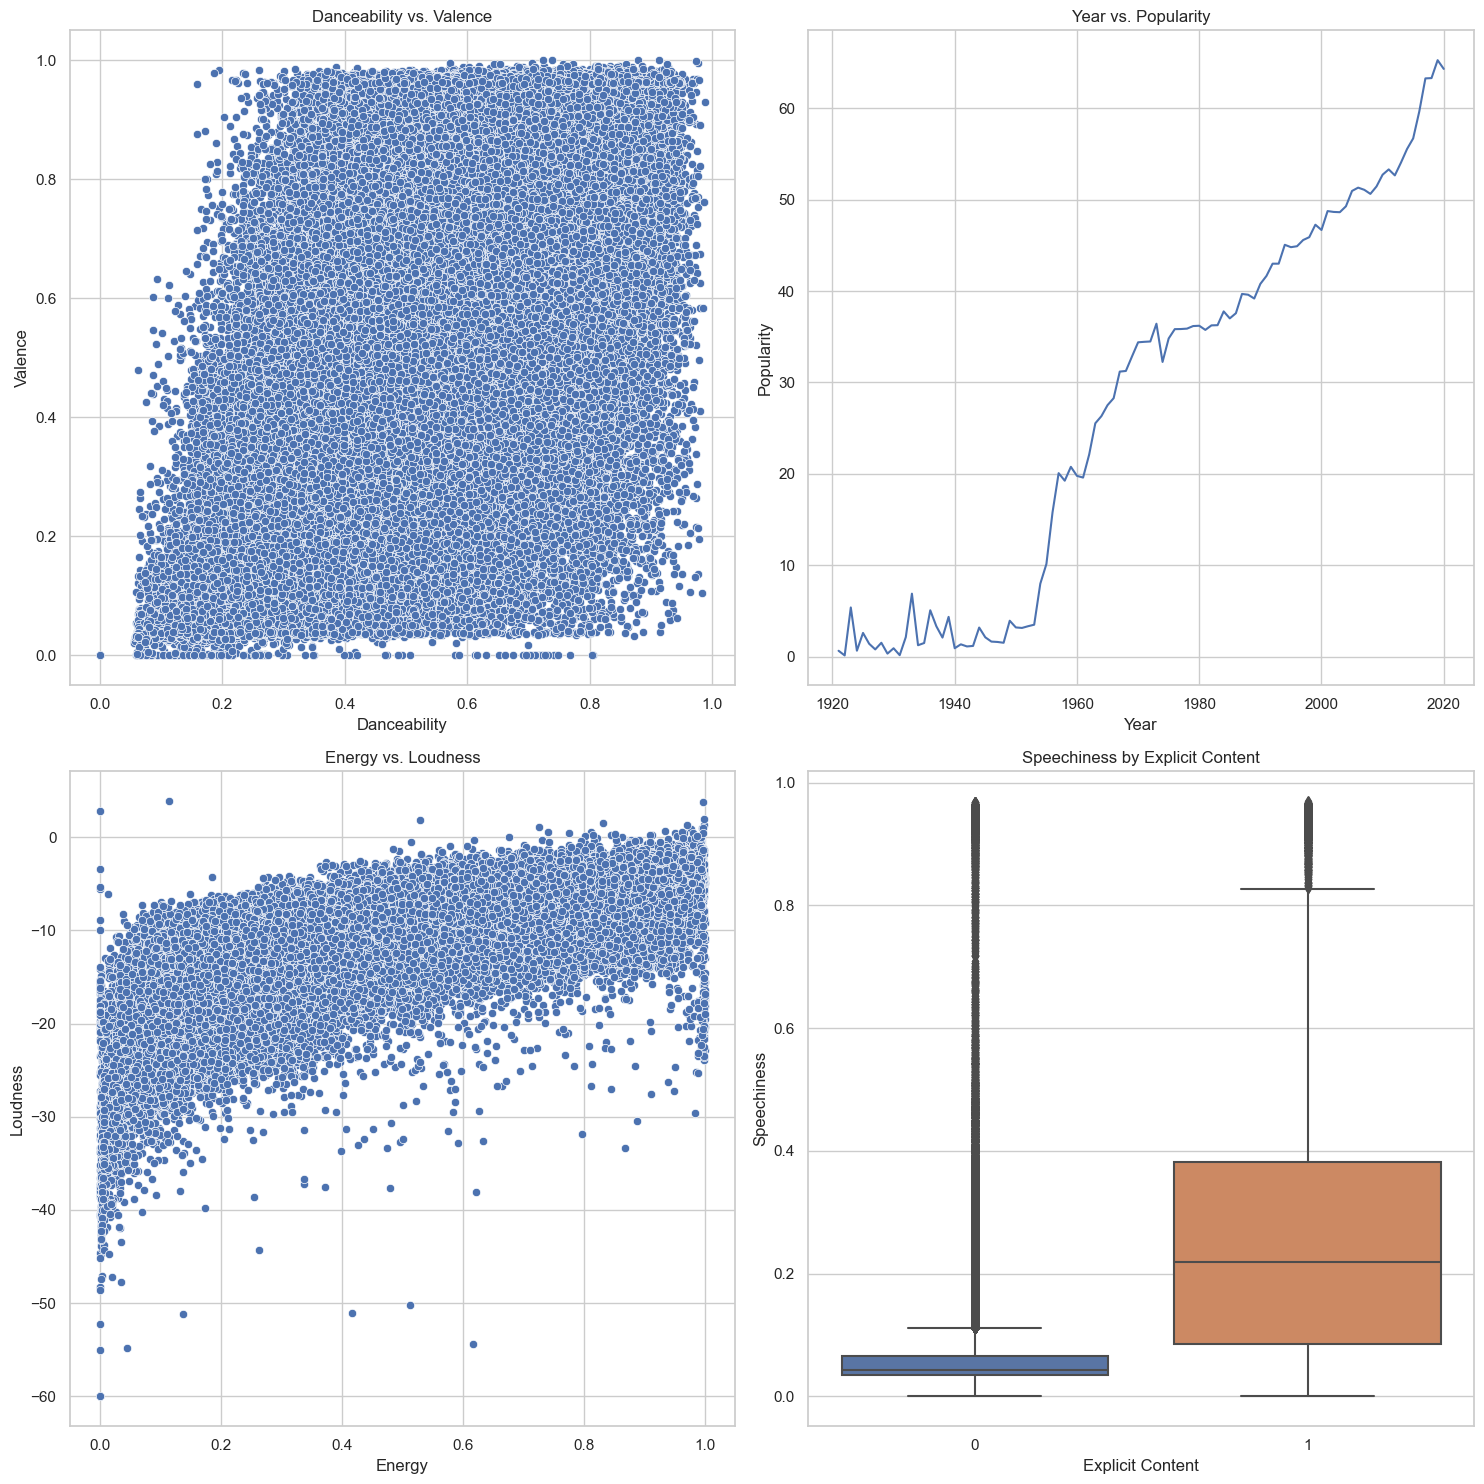

In [11]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 3 Rows, 2 Columns

# Danceability vs. Valence
sns.scatterplot(ax=axes[0, 0], data=data, x='danceability', y='valence')
axes[0, 0].set_title('Danceability vs. Valence')
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Valence')

# Year vs. Popularity
sns.lineplot(ax=axes[0, 1], data=data, x='year', y='popularity', ci=None)
axes[0, 1].set_title('Year vs. Popularity')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Popularity')

# Energy vs. Loudness
sns.scatterplot(ax=axes[1, 0], data=data, x='energy', y='loudness')
axes[1, 0].set_title('Energy vs. Loudness')
axes[1, 0].set_xlabel('Energy')
axes[1, 0].set_ylabel('Loudness')


# Speechiness vs. Explicit
sns.boxplot(ax=axes[1, 1], data=data, x='explicit', y='speechiness')
axes[1, 1].set_title('Speechiness by Explicit Content')
axes[1, 1].set_xlabel('Explicit Content')
axes[1, 1].set_ylabel('Speechiness')



# Adjust layout
plt.tight_layout()
plt.show()


Danceability vs. Valence: Shows no clear correlation between how danceable a song is and its positivity level. The data is spread evenly across all values.

Year vs. Popularity: Indicates a significant increase in song popularity from the 1960s to the present, with a particularly sharp rise in recent years.

Energy vs. Loudness: Demonstrates a positive relationship, with more energetic songs generally being louder.

Speechiness by Explicit Content: Reveals that explicit songs tend to have a higher range and median of speechiness compared to non-explicit songs.





In [37]:
# Group the data by 'year' and calculate the mean only for numeric columns
year_data = data.select_dtypes(include=['float64', 'int64']).groupby('year').mean().reset_index()

# Now 'year' should be one of the columns, so we can use it in the plot
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')

# Show the plot
fig.show()

In [38]:
fig = px.line(year_data, x='year', y='loudness',title='Trend of loudness over decades')
fig.show()

The chart indicates significant changes in the acousticness and instrumentalness of music over time, while other features like danceability, energy, liveness, and valence have shown more stability or minor fluctuations.




## Artists df


In [13]:
artist_data.head()

mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286          0.009400  0.195000 -10.236714   

   speechiness       tempo   valence  popularity  key  
0     0.210389  117.518111  0.389500   38.333333    5  
1     0.176212  103.044154  0.268865   30.576923    5  
2     0.118514   77.375857  0.354857   34.857143    0  
3     0.123200   88.667630  0.372030   34.851852    0  
4     0.098543  122.835857  0.482286   43.000000    5

In [14]:
top10_popular_artists = artist_data.nlargest(10, 'popularity')
top10_most_song_produced_artists = artist_data.nlargest(10, 'count')
print('Top 10 Artists that produced most songs:')
top10_most_song_produced_artists[['count','artists']].sort_values('count',ascending=False)

Top 10 Artists that produced most songs:


count            artists
8367    3169   Francisco Canaro
28561   2422   Эрнест Хемингуэй
28560   2136  Эрих Мария Ремарк
8434    1459      Frank Sinatra
10714   1256    Ignacio Corsini
27109   1200  Vladimir Horowitz
1682    1146   Arturo Toscanini
2707    1103     Billie Holiday
12378   1061        Johnny Cash
7426    1023      Elvis Presley

In [15]:
print('Top 10 Artists that had most popularity score:')
top10_popular_artists[['popularity','artists']].sort_values('popularity',ascending=False)

Top 10 Artists that had most popularity score:


popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
23687        88.0        Surf Mesa
28263        88.0      salem ilese
213          87.0              A7S
2343         86.0          Beltito
14378        86.0     Lenny Santos

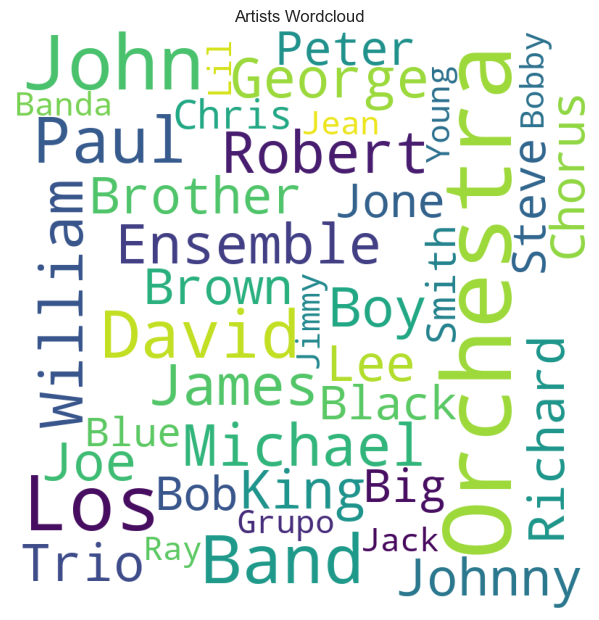

In [43]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
comment_words = " ".join(artist_data['artists'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=3,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Artists Wordcloud")
plt.tight_layout(pad = 0)
plt.show()

## Genre df

In [24]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

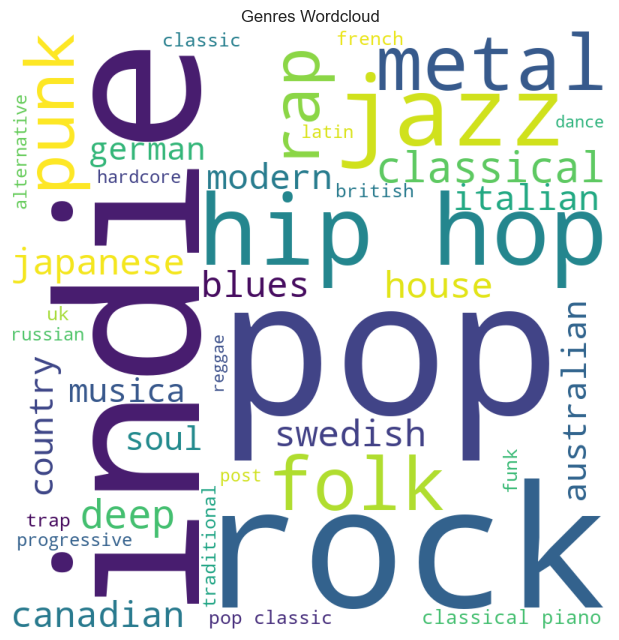

In [41]:
stopwords = set(STOPWORDS)
comment_words = " ".join(genre_data['genres'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genres Wordcloud")
plt.show()